In [3]:
from matipo import SEQUENCE_DIR, GLOBALS_DIR
from matipo.sequence import Sequence
from matipo.util.autophase import autophase
from matipo.util.decimation import decimate
from matipo.util.fft import fft_reconstruction
import numpy as np
import matplotlib.pyplot as plt

# progress_handler for Sequence.run() that simply prints the progress
def print_progress(p, l):
    print(p, '/', l)

In [11]:
# load Spin Echo pulse sequence
seq = Sequence(SEQUENCE_DIR+'SE.py')

# load relevant global variables
seq.loadpar(GLOBALS_DIR+'frequency.yaml')
seq.loadpar(GLOBALS_DIR+'shims.yaml')
seq.loadpar(GLOBALS_DIR+'hardpulse_90.yaml')
seq.loadpar(GLOBALS_DIR+'hardpulse_180.yaml')

seq.setpar(
    g_read=(0,0,0.5),
    
    # read for 2000 us at 5 us dwell time
    t_dw=5e-6,
    n_samples=1000,
    
    t_echo=6000e-6,
    t_end=0.5,
    n_scans=2
)

# print out the parameter set for reference
print(seq.par)

# run sequence, progress_handler is optional
y = await seq.run(progress_handler=print_progress)

ParameterSet(n_scans=2, f=15091502.70579668, a_90=0.33646385148222363, t_90=3.2e-05, a_180=0.705283649077263, t_180=3.2e-05, t_dw=5e-06, n_samples=1000, t_echo=0.006, t_end=0.5, g_read=array([0. , 0. , 0.5]), t_grad_rise=5e-05, shim_x=0.18399363695583978, shim_y=0.18205330159470795, shim_z=-0.4567334173143255, shim_z2=-0.21283503889017835, shim_zx=-0.45566500428582535, shim_zy=0.06292884647672894, shim_xy=0.031063959953986156, shim_x2y2=0.2780328598595331)
1 / 2
2 / 2


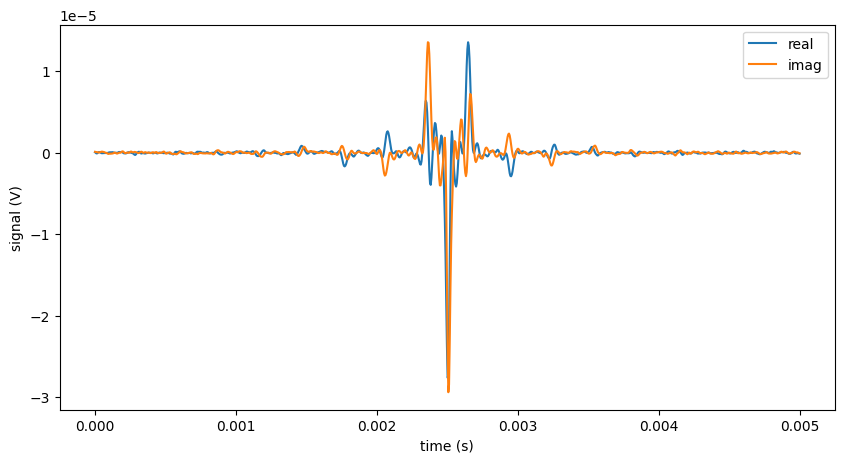

In [12]:
t = np.linspace(0, seq.par.n_samples*seq.par.t_dw, seq.par.n_samples)

plt.figure(figsize=(10, 5), dpi=100)
plt.plot(t, y.real, label='real')
plt.plot(t, y.imag, label='imag')
plt.ylabel('signal (V)')
plt.xlabel('time (s)')
plt.legend()
plt.show()

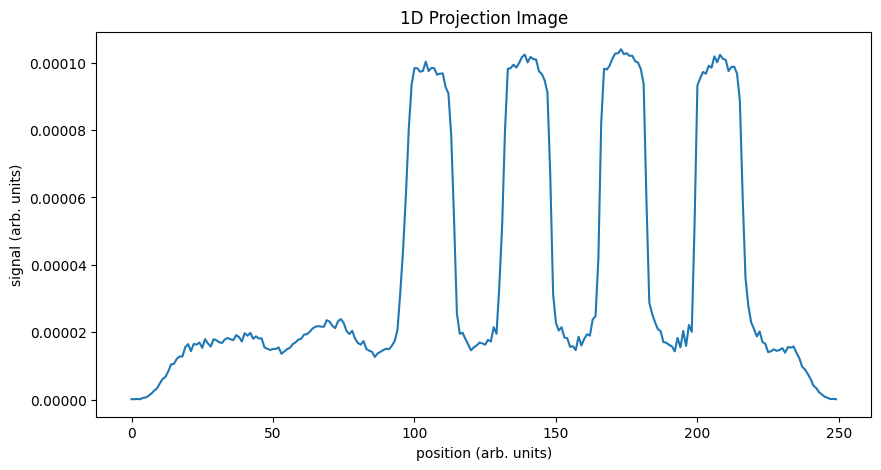

In [13]:
# The above data is the raw data from the hardware DSP, which does not have a flat frequency response
# to correct for it, oversample and use the decimate function in matipo.util.decimation
# an oversampling factor of 4 is recommended
y_dec = decimate(y, 4)
image = np.fft.fftshift(np.fft.fft(y_dec))

plt.figure(figsize=(10, 5), dpi=100)
plt.plot(np.abs(image))
plt.ylabel('signal (arb. units)')
plt.xlabel('position (arb. units)')
plt.title('1D Projection Image')
plt.show()